# Práctica Machine Learning

#### Autor: Ramón-Armand Laborda Moreu

El objetivo de la práctica consiste en la búsqueda de un modelo óptimo que pueda estimar el precio de una vivienda con la suficiente precisión cumpliendo las principales asunciones estadísticas. El dataset es el resultado de un scraping a la web de Airbnb. A grandes rasgos se pretende cubrir los siguientes puntos centrados en un problema de regresión.

1. Preparación de datos
2. Análisis exploratorio
3. Preprocesamiento de datos
4. Modelado
5. Conclusión

#### 1. Preparación de datos

In [227]:
import pandas as pd

# Cargamos fichero csv y almacenamos en pandas df
airbnb = pd.read_csv(r'data/airbnb-listings-extract.csv', sep=';')

Una vez cargado el dataset y previo a separar en dos muestras (train y test) visualizamos una muestra de los datos así como la estructura general para detectar cual es la variable dependiente (objeto de estudio) y las independientes. Si es necesario eliminamos variables que carezcan de información general u observaciones no etiquetadas de la variable dependiente.

In [228]:
airbnb.head(7)

ID                            Listing Url       Scrape ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   
2  17584891  https://www.airbnb.com/rooms/17584891  20170407214050   
3   5398030   https://www.airbnb.com/rooms/5398030  20170407214050   
4  18104606  https://www.airbnb.com/rooms/18104606  20170407214050   
5  15695269  https://www.airbnb.com/rooms/15695269  20170407214050   
6   1295958   https://www.airbnb.com/rooms/1295958  20170407214050   

  Last Scraped                                 Name  \
0   2017-03-07       The Loft-Full Bath-Deck w/View   
1   2017-04-08           Claris I, Friendly Rentals   
2   2017-04-08  Style Terrace Red, Friendly Rentals   
3   2017-04-08    Picasso Suite 1.4 Paseo de Gracia   
4   2017-04-08       Smart City Centre Apartment II   
5   2017-04-08            55. Valencia II Apartment   
6   2017-04-08      3 BR + 2 baths near the beach!!   

                                             Summary  \
0  Loft in the Hill country 12-15 minutes directl...   
1  This apartment has: 1 double bed, 1 double sof...   
2  This apartment has: 1 double bed, 1 double sof...   
3  Live like a local in Barcelona's most chic dis...   
4  Unique apartment in vibrant neighborhoods, car...   
5  Unique apartment in vibrant neighborhoods, car...   
6  Spacious and quiet apartment that can accommod...   

                                               Space  \
0  This loft has a spectacular view of the hills ...   
1  This apartment has: 1 double bed, 1 double sof...   
2  This apartment has: 1 double bed, 1 double sof...   
3  You wake up to the sun rising over Barcelona's...   
4  License: HUTB-005313 Charming apartment, locat...   
5  This fully refurbished apartment has 2 bedroom...   
6  Its size allows to accommodate up to 6 people ...   

                                         Description Experiences Offered  \
0  Loft in the Hill country 12-15 minutes directl...                none   
1  This apartment has: 1 double bed, 1 double sof...                none   
2  This apartment has: 1 double bed, 1 double sof...                none   
3  Live like a local in Barcelona's most chic dis...                none   
4  Unique apartment in vibrant neighborhoods, car...                none   
5  Unique apartment in vibrant neighborhoods, car...                none   
6  Spacious and quiet apartment that can accommod...                none   

                               Neighborhood Overview  ...  \
0  This neighborhood is located in the hills west...  ...   
1  Plaza   Cataluña Catalonia Square is the large...  ...   
2  Plaza   Cataluña Catalonia Square is the large...  ...   
3  We're right in the heart of the chic L'Eixampl...  ...   
4                                                NaN  ...   
5                                                NaN  ...   
6  This unique area is rich in history, architect...  ...   

  Review Scores Communication Review Scores Location Review Scores Value  \
0                        10.0                   10.0                10.0   
1                        10.0                    8.0                10.0   
2                         NaN                    NaN                 NaN   
3                        10.0                   10.0                 9.0   
4                         NaN                    NaN                 NaN   
5                         NaN                    NaN                 NaN   
6                        10.0                    9.0                 9.0   

          License Jurisdiction Names Cancellation Policy  \
0             NaN                NaN            moderate   
1     HUTB-006721                NaN     super_strict_30   
2     HUTB-007527                NaN     super_strict_30   
3             NaN                NaN              strict   
4             NaN                NaN            flexible   
5             NaN                NaN      

In [229]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [230]:
# Listado de variables que carecen de interés para el estudio
del_columns = ['Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host About', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Weekly Price', 'Monthly Price', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Jurisdiction Names']

El criterio para decidir si una variable carece de interés es subjetivo pero por lo general han sido seleccionadas todas las columnas que:
- Contengan url's
- Campos descriptivos del que no se piense hacer un análisis de NLP (la idea es estimar el precio con la mayor objetividad posible y cada host añade descriptivos que pueden distorsionar la realidad)
- Id's secundarios (mantenemos en los datos la columna ID por si hubiese que recuperar algún dato)
- Fechas referentes al método de estracción de datos
- Nombres y cualidades del host
- Columnas referentes a la dirección (excluyendo longitud y latitud)
- Fechas de reseñas
- Columnas con todos los datos missing (aun no se ha realizado ninguna función pero en el data wrangler usado como visor aparece por defecto el número total de valores faltantes y distintos)
- Otras columnas de Precios que son agregados del precio diario y presentaran a priori una alta correlación (presentaban muchos valores nulos)
- Número de Licencia y nombre de Jurisdicción

In [231]:
airbnb_col_fil = airbnb.drop(del_columns, axis =1)

In [232]:
print("Primer df:  ", airbnb.shape, "\n" + "Segundo df: ", airbnb_col_fil.shape)
# Hemos reducido más de la mitad del número de columnas (46)

Primer df:   (14780, 89) 
Segundo df:  (14780, 43)


Para mitigar cualquier selección de las muestras train y test con observaciones cuya variable de estudio sea nula, filtramos el dataframe. No queremos observaciones que no estén etiquetadas ya que los métodos que usaremos en el futuro requieren de dicha información para poder medir el error.

In [233]:
airbnb_row_fil = airbnb_col_fil[~airbnb_col_fil['Price'].isnull()]

In [234]:
print("Primer df:  ", airbnb_col_fil.shape, "\n" + "Segundo df: ", airbnb_row_fil.shape)
# Hemos eliminado 7 observaciones carentes de Precio

Primer df:   (14780, 43) 
Segundo df:  (14763, 43)


Ahora ya podemos dividir nuestra muestra de Airbnb en 2 sub muestras train con la que entrenaremos el modelo y test con la que evaluaremos como desempeña

In [235]:
import sklearn
from sklearn.model_selection import train_test_split

train, test = train_test_split(airbnb_row_fil, test_size = 0.3, shuffle = True, random_state = 420)

print(f'Dimensiones del dataset de training: {train.shape}, proporción de {(train.shape[0]/airbnb_row_fil.shape[0])*100:.0f}%')
print(f'Dimensiones del dataset de test: {test.shape}, proporción de {(test.shape[0]/airbnb_row_fil.shape[0])*100:.0f}%')

# Guardamos ambos ficheros aunque hemos especificado una semilla en el random_state
train.to_csv(r'data/airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv(r'data/airbnb_test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (10334, 43), proporción de 70%
Dimensiones del dataset de test: (4429, 43), proporción de 30%


#### 2. Análisis Exploratorio

El análisis exploratorio servirá para realizar un procesamiento de datos que limpie y depure todo lo necesario. También ayudará a entender la naturaleza y distribución de los datos para determinar que modelo se adapta mejor.

In [236]:
train.describe()

ID  Host Response Rate  Host Listings Count  \
count  1.033400e+04         9012.000000         10332.000000   
mean   1.028419e+07           94.963160            12.445993   
std    5.559048e+06           14.825346            33.849160   
min    1.862800e+04            0.000000             0.000000   
25%    5.615668e+06          100.000000             1.000000   
50%    1.136236e+07          100.000000             2.000000   
75%    1.531121e+07          100.000000             6.000000   
max    1.858361e+07          100.000000           519.000000   

       Host Total Listings Count      Latitude     Longitude  Accommodates  \
count               10332.000000  10334.000000  10334.000000  10334.000000   
mean                   12.445993     40.505776     -3.910722      3.296787   
std                    33.849160      4.495461     14.015642      2.109615   
min                     0.000000    -37.851182   -123.131344      1.000000   
25%                     1.000000     40.409917     -3.707628      2.000000   
50%                     2.000000     40.419722     -3.700665      3.000000   
75%                     6.000000     40.430972     -3.683676      4.000000   
max                   519.000000     55.966912    153.371427     16.000000   

          Bathrooms      Bedrooms          Beds  ...  Number of Reviews  \
count  10300.000000  10318.000000  10307.000000  ...       10334.000000   
mean       1.285485      1.350746      2.061415  ...          22.705825   
std        0.661582      0.908195      1.631491  ...          38.366503   
min        0.000000      0.000000      1.000000  ...           0.000000   
25%        1.000000      1.000000      1.000000  ...           1.000000   
50%        1.000000      1.000000      2.000000  ...           7.000000   
75%        1.000000      2.000000      2.000000  ...          27.000000   
max        8.000000     10.000000     16.000000  ...         446.000000   

       Review Scores Rating  Review Scores Accuracy  \
count           8037.000000             8020.000000   
mean              91.769192                9.423940   
std                8.886800                0.910553   
min               20.000000                2.000000   
25%               89.000000                9.000000   
50%               94.000000               10.000000   
75%               98.000000               10.000000   
max              100.000000               10.000000   

       Review Scores Cleanliness  Review Scores Checkin  \
count                8024.000000            8011.000000   
mean                    9.338360               9.626514   
std                     0.968039               0.789011   
min                     2.000000               2.000000   
25%                     9.000000               9.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       Review Scores Communication  Review Scores Location  \
count                  8025.000000             8009.000000   
mean                      9.648100                9.549757   
std                       0.762748                0.763525   
min                       2.000000                2.000000   
25%                       9.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       Review Scores Value  Calculated host listings count  Reviews per Month  
count          8008.000000                    10331.000000        8148.000000  
mean              9.225400                        9.489110           1.864948  
std               0.939546                       23.598028           1.868944  
min               2.000000                        1.000000           0.020000  
25%               9.000000                        1.000000           0.450

In [237]:
train.isnull().any()

ID                                False
Host Location                      True
Host Response Time                 True
Host Response Rate                 True
Host Neighbourhood                 True
Host Listings Count                True
Host Total Listings Count          True
Neighbourhood Cleansed            False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Square Feet                        True
Price                             False
Security Deposit                   True
Cleaning Fee                       True
Guests Included                   False
Extra People                      False
Minimum Nights                    False


Solo con las dos instrucciones anteriores nos damos cuenta que todavía tenemos un gran número de variables (podemos abrir el output en un editor de texto pero en el log queda truncado). Lo ideal y como procedemos será analizar por grupos de variables homogeneas. Las compararemos entre sí y con el objeto de estudio.

In [238]:
# Variables relacionadas con el Host
val_host = ['Host Location', 'Host Response Time', 'Host Response Rate', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']
len(val_host)

7

In [239]:
# Variables relacionadas con la dirección
val_dir = ['Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Geolocation']
len(val_dir)

4

In [240]:
# Variables relacionadas con características físicas del Airbnb
val_air = ['Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet']
len(val_air)

9

In [241]:
# Variables relacionadas con condiciones de alquiler del Airbnb
val_rent = ['Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Cancellation Policy', 'Features']
len(val_rent)

12

In [242]:
# Variables Relacionadas con las reseñas
val_res = ['Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month']
len(val_res)

9

In [243]:
# Comprobamos si todas las columnas se contemplan para el estudio
listas_comprobacion = val_host + val_dir + val_air + val_rent + val_res

for i in train.columns:
    if i not in listas_comprobacion:
        print(f"Falta incluir: {i}")

Falta incluir: ID
Falta incluir: Price


Tanto el ID como la variable objeto de estudio no las tendremos en cuenta para incluirlas en los subsets de columnas

In [244]:
len(train.columns) == 2 + len(val_host) + len(val_dir) + len(val_air) + len(val_rent) + len(val_res)

True

Antes de comenzar con el estudio de los distintos grupos de variables, creamos una función personalizada con los principales estadísticos igual que la función nativa de pandas.describe() pero añadiendo el número de valores nulos y la correlación con la primera columna que será el objeto de estudio. Con esto ahorraremos celdas. 

In [245]:
import numpy as np

def custom_descibre(df):

    # Solo columnas tipo numericas
    numeric_df = df.select_dtypes(include=[np.number])
    
    count = numeric_df.count()
    mean = numeric_df.mean()
    std = numeric_df.std()
    min_value = numeric_df.min()
    quantile_25 = numeric_df.quantile(0.25)
    median = numeric_df.median()
    quantile_75 = numeric_df.quantile(0.75)
    max_value = numeric_df.max()
    nulls = numeric_df.isnull().sum() 
    correlacion = numeric_df.corrwith(numeric_df.iloc[:, 0])
    
    stats_df = pd.DataFrame({
        'count': count,
        'mean': mean,
        'std': std,
        'min': min_value,
        '25%': quantile_25,
        '50%': median,
        '75%': quantile_75,
        'max': max_value,
        'nulls': nulls,
        'Corr': correlacion
    })
    
    return stats_df

#### 2.1 Variables relacionadas con el Host

In [246]:
train[['Price'] + val_host].head()

Price                       Host Location  Host Response Time  \
13748   45.0  Madrid, Community of Madrid, Spain  within a few hours   
9656    76.0      Palma, Balearic Islands, Spain      within an hour   
1379    50.0               Madrid, Madrid, Spain      within an hour   
11537   23.0  Madrid, Community of Madrid, Spain                 NaN   
8021    56.0  Madrid, Community of Madrid, Spain      within an hour   

       Host Response Rate Host Neighbourhood  Host Listings Count  \
13748               100.0          La Latina                  1.0   
9656                100.0                NaN                  4.0   
1379                100.0           Malasaña                 11.0   
11537                 NaN                NaN                  1.0   
8021                100.0        Embajadores                  1.0   

       Host Total Listings Count  Calculated host listings count  
13748                        1.0                             1.0  
9656                         4.0                             3.0  
1379                        11.0                            11.0  
11537                        1.0                             1.0  
8021                         1.0                             1.0

In [247]:
custom_descibre(train[['Price'] + val_host])

count       mean        std  min    25%  \
Price                           10334  73.834817  70.928807  9.0   35.0   
Host Response Rate               9012  94.963160  14.825346  0.0  100.0   
Host Listings Count             10332  12.445993  33.849160  0.0    1.0   
Host Total Listings Count       10332  12.445993  33.849160  0.0    1.0   
Calculated host listings count  10331   9.489110  23.598028  1.0    1.0   

                                  50%    75%    max  nulls      Corr  
Price                            56.0   89.0  969.0      0  1.000000  
Host Response Rate              100.0  100.0  100.0   1322  0.011738  
Host Listings Count               2.0    6.0  519.0      2  0.236560  
Host Total Listings Count         2.0    6.0  519.0      2  0.236560  
Calculated host listings count    2.0    5.0  145.0      3  0.234203

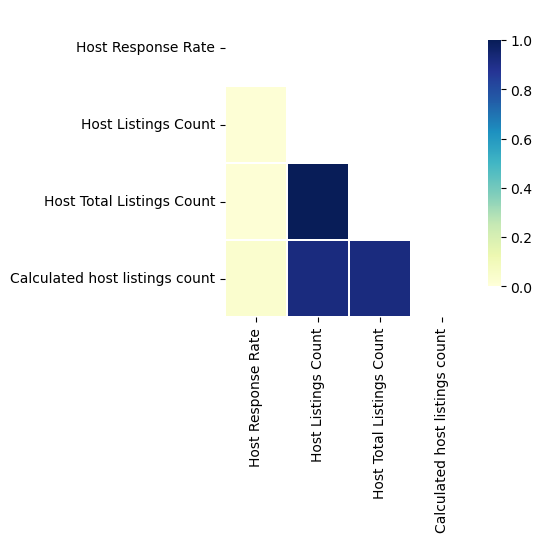

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = np.abs(train[val_host].drop(['Host Location', 'Host Response Time', 'Host Neighbourhood'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [249]:
train[['ID']+ val_host][['ID', 'Host Response Time']].groupby('Host Response Time', dropna = False).count()

ID
Host Response Time      
a few days or more   201
within a day        1245
within a few hours  2013
within an hour      5553
NaN                 1322

Las conclusiones tras observar los primeros estadísticos son:

* <u>**Host Location:**</u> Localización del Host en string carece de interés. Si fuese del apartamento se valoraría la codificación. Se puede eliminar la variable.
* <u>**Host Response Time:**</u> El tiempo que tarda el host en contestar tiene muchos valores nulos y prácticamente correlación cero con la variable de objeto de estudio. Se puede eliminar la variable.
* <u>**Host Response Rate:**</u> El tiempo que tarda el host en contestar es una variable categórica que podemos codificar para transformar en discreta.
* <u>**Host Neighbourhood:**</u> El vecindario del host en string carece de sentido igual que la dirección. Se puede eliminar la variable.
* <u>**Host Listings Count:**</u> El numero de Airbnb's que tiene un Host podría ser de interés. Observamos que de media un host tiene más de 12 airbnb's lo que hace pensar que hay algún host que desvirtua el estadístico. Viendo el cuartil 3 el 75% de los hosts tienen 6 o menos airbnb's.
* <u>**Host Total Listing Count:**</u> El color de la correlación es prácticamente 1 con la variable anterior por lo que podemos eliminar esta variable.
* <u>**Calculated host listings count:**</u> Correlación muy próxima a 1 y con 1 valor missing más con respecto a Host Listing Count. Es la misma variable pero depurada y corregida (no existe el valor atípico). Usaremos esta variable. Se puede eliminar la variable Host Listings Count.


#### 2.2 Variables relacionadas con la dirección

In [250]:
train[['Price'] + val_dir].head()

Price Neighbourhood Cleansed   Latitude  Longitude  \
13748   45.0            Embajadores  40.406915  -3.705853   
9656    76.0      Palma de Mallorca  39.572762   2.647736   
1379    50.0            Embajadores  40.407502  -3.699373   
11537   23.0                Acacias  40.396398  -3.706252   
8021    56.0            Embajadores  40.408940  -3.698995   

                        Geolocation  
13748  40.4069146026,-3.70585340101  
9656     39.5727620344,2.6477358056  
1379   40.4075017006,-3.69937311056  
11537  40.3963977918,-3.70625235516  
8021   40.4089401144,-3.69899515645

In [251]:
import folium
from folium.plugins import MarkerCluster

mapa = folium.Map(location=[40.406915, -3.705853],  zoom_start=3)

marker_cluster = MarkerCluster().add_to(mapa)

for i, row in train[val_dir][['Latitude','Longitude']].iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']]).add_to(marker_cluster)

mapa

In [252]:
train[['ID']+ val_dir][['ID', 'Neighbourhood Cleansed']].groupby('Neighbourhood Cleansed', dropna = False).count()

ID
Neighbourhood Cleansed     
78704                     2
78733                     1
Abrantes                 10
Acacias                 104
Adams                     1
...                     ...
sterbro                   2
südliche Luisenstadt      1
Élysée                    5
ΝΕΟΣ ΚΟΣΜΟΣ               1
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ          1

[427 rows x 1 columns]

In [253]:
train[val_dir][['Neighbourhood Cleansed']].isnull().sum()

Neighbourhood Cleansed    0
dtype: int64

Tras el análisis exploratorio de los datos, observamos que el grueso de los Airbnb's se encuentra en España. Adicionalmente, la localización de un Airbnb es crucial y depende del precio. Por lo tanto:

* <u> **Neighbourhood Cleansed:** </u> Variable tipo string que habría que codificar. Descartaremos por el momento.
* <u> **Latitude:** </u> Mantenemos en el estudio para determinar el precio del Airbnb en conjunto con la longitud.
* <u> **Longitude:** </u> Mantenemos en el estudio para determinar el precio del Airbnb en conjunto con la latitud.
* <u> **Geolocation:** </u> Consiste en la concatenación de la longitud y latitud por lo que podemos descartar la variable.

#### 2.3 Variables relacionadas con características físicas del Airbnb

In [254]:
train[['Price'] + val_air].head()

Price Property Type        Room Type  Accommodates  Bathrooms  \
13748   45.0     Apartment  Entire home/apt             2        1.0   
9656    76.0     Apartment  Entire home/apt             2        1.0   
1379    50.0     Apartment  Entire home/apt             4        1.0   
11537   23.0     Apartment     Private room             1        1.0   
8021    56.0     Apartment  Entire home/apt             3        1.0   

       Bedrooms  Beds       Bed Type  \
13748       1.0   1.0       Real Bed   
9656        1.0   2.0       Real Bed   
1379        0.0   2.0       Real Bed   
11537       1.0   1.0       Real Bed   
8021        1.0   2.0  Pull-out Sofa   

                                               Amenities  Square Feet  
13748  TV,Internet,Wireless Internet,Air conditioning...          NaN  
9656   TV,Internet,Wireless Internet,Air conditioning...          NaN  
1379   TV,Wireless Internet,Kitchen,Smoking allowed,P...          NaN  
11537  TV,Internet,Wireless Internet,Wheelchair acces...          NaN  
8021   TV,Internet,Wireless Internet,Kitchen,Breakfas...          NaN

In [255]:
custom_descibre(train[['Price'] + val_air])

count        mean         std  min   25%   50%    75%     max  \
Price         10334   73.834817   70.928807  9.0  35.0  56.0   89.0   969.0   
Accommodates  10334    3.296787    2.109615  1.0   2.0   3.0    4.0    16.0   
Bathrooms     10300    1.285485    0.661582  0.0   1.0   1.0    1.0     8.0   
Bedrooms      10318    1.350746    0.908195  0.0   1.0   1.0    2.0    10.0   
Beds          10307    2.061415    1.631491  1.0   1.0   2.0    2.0    16.0   
Square Feet     408  403.678922  681.306118  0.0   0.0  98.5  646.0  6997.0   

              nulls      Corr  
Price             0  1.000000  
Accommodates      0  0.527395  
Bathrooms        34  0.381447  
Bedrooms         16  0.502090  
Beds             27  0.446070  
Square Feet    9926  0.430681

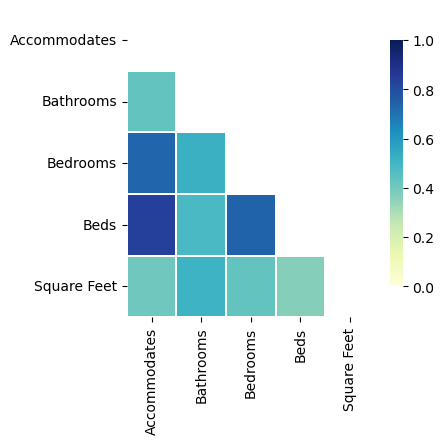

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = np.abs(train[val_air].drop(['Property Type', 'Room Type', 'Bed Type', 'Amenities'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [257]:
train[['ID']+ val_air][['ID', 'Property Type']].groupby('Property Type', dropna = False).count()

ID
Property Type           
Apartment           8370
Bed & Breakfast      252
Boat                   3
Boutique hotel         4
Bungalow               1
Camper/RV              3
Casa particular        1
Chalet                16
Condominium          252
Dorm                  33
Earth House            1
Guest suite            2
Guesthouse            34
Hostel                13
House                954
Loft                 205
Other                158
Serviced apartment     8
Tent                   1
Timeshare              1
Townhouse             10
Villa                 12

In [258]:
train[['ID']+ val_air][['ID', 'Room Type']].groupby('Room Type', dropna = False).count()

ID
Room Type            
Entire home/apt  6329
Private room     3872
Shared room       133

In [259]:
train[['ID']+ val_air][['ID', 'Bed Type']].groupby('Bed Type', dropna = False).count()

ID
Bed Type            
Airbed             4
Couch             16
Futon             32
Pull-out Sofa    182
Real Bed       10100

In [260]:
train[['ID']+ val_air][['ID', 'Amenities']].groupby('Amenities', dropna = False).count()

ID
Amenities                                              
Air conditioning,Breakfast,Washer,Essentials,Ha...    1
Air conditioning,Elevator in building,Heating,F...    1
Air conditioning,Heating,Essentials,translation...    1
Air conditioning,Heating,First aid kit,Essentia...    1
Air conditioning,Kitchen,Breakfast,Buzzer/wirel...    1
...                                                 ...
Wireless Internet,translation missing: en.hosti...    3
translation missing: en.hosting_amenity_49            1
translation missing: en.hosting_amenity_49,tran...   25
translation missing: en.hosting_amenity_50            2
NaN                                                 115

[8900 rows x 1 columns]

In [261]:
train[val_air]['Amenities'].str.split(',').explode().drop_duplicates().tolist()

['TV',
 'Internet',
 'Wireless Internet',
 'Air conditioning',
 'Kitchen',
 'Heating',
 'Washer',
 'Dryer',
 'Fire extinguisher',
 'Essentials',
 'Hangers',
 'Hair dryer',
 'Iron',
 'Laptop friendly workspace',
 'translation missing: en.hosting_amenity_49',
 'translation missing: en.hosting_amenity_50',
 'Smoking allowed',
 'Family/kid friendly',
 'Suitable for events',
 'Smoke detector',
 'Carbon monoxide detector',
 'Shampoo',
 '24-hour check-in',
 'Pets allowed',
 'Wheelchair accessible',
 'Doorman',
 'Gym',
 'Buzzer/wireless intercom',
 'Lock on bedroom door',
 'Breakfast',
 'First aid kit',
 'Elevator in building',
 nan,
 'Cable TV',
 'Pool',
 'Free parking on premises',
 'Pets live on this property',
 'Bathtub',
 'Safety card',
 'Private entrance',
 'Self Check-In',
 'Doorman Entry',
 'Cat(s)',
 'Smartlock',
 'Dog(s)',
 'Keypad',
 'Private living room',
 'Game console',
 'Lockbox',
 'Hot tub',
 'Indoor fireplace',
 'Other pet(s)',
 'Pack ’n Play/travel crib',
 'Room-darkening sha

Las conclusiones tras observar los primeros estadísticos son:

* <u> **Property Type:** </u> Variable tipo string que habría que codificar. El grueso de las observaciones son Apartamentos.
* <u> **Room Type:** </u> Variable tipo string que habría que codificar. El grueso de las observaciones son Apartamentos completos.
* <u> **Accommodates:** </u> Variable de tipo numérico sin nulos que por el nombre indica el número de personas que puede alojar (acomodar) un airbnb. Mantenemos como variable de interés en el estudio del precio.
* <u> **Bathrooms:** </u> Igual que en el caso anterior, indica el número de baños que dispone el Airbnb. Habría que determinar el motivo por el cual hay airbnb's con 0 baños si por política al menos tiene que tener 1. Mantenemos como variable de interés.
* <u> **Bedrooms:** </u> Idem con el punto anterior.
* <u> **Beds:** </u> Idem con el punto anterior. El máximo de camas cuadra con el máximo de personas que pueden estar alojadas en un airbnb. Correlación alta con dicha variable.
* <u> **Bed Type:** </u> Variable tipo string que habría que codificar. Tiene sentido tener en cuenta esta variable como interés para el estudio.
* <u> **Amenities:** </u> Contiene la concatenación de todas las comodidades con las que cuenta un Airbnb. Se observan un gran número distinto de comodidades y para tenerlas todas en cuenta podríamos generar una matriz dicotómica asociada a cada airbnb o alguna variable suelta de caracter booleano si solo se quisiera tener en cuenta una comodidad en concreto. Por el momento descartamos el uso de esta variable en el estudio inicial.
* <u> **Square Feet:** </u> Variable numérica con gran cantidad de datos nulos que aportaría mucho valor a la variable dependiente. Descartamos a priori del estudio ya que tiene menos de 1/3 de información.

#### 2.4 Variables relacionadas con condiciones de alquiler del Airbnb

In [262]:
train[['Price'] + val_rent].head()

Price  Security Deposit  Cleaning Fee  Guests Included  Extra People  \
13748   45.0               NaN          20.0                1             0   
9656    76.0               NaN           NaN                1             0   
1379    50.0             150.0          20.0                2            10   
11537   23.0               NaN           NaN                1             0   
8021    56.0             150.0          20.0                1             0   

       Minimum Nights  Maximum Nights  Availability 30  Availability 60  \
13748               2            1125                4               10   
9656                3            1125                6               15   
1379                1            1125               12               38   
11537               2            1125                0                0   
8021                1            1125                1                3   

       Availability 90  Availability 365 Cancellation Policy  \
13748               34               309            moderate   
9656                30               201              strict   
1379                61               231              strict   
11537                0                 0            flexible   
8021                 8                80            moderate   

                                                Features  
13748  Host Is Superhost,Host Has Profile Pic,Host Id...  
9656   Host Is Superhost,Host Has Profile Pic,Host Id...  
1379   Host Has Profile Pic,Requires License,Instant ...  
11537  Host Has Profile Pic,Requires License,Instant ...  
8021   Host Has Profile Pic,Is Location Exact,Require...

In [263]:
custom_descibre(train[['Price'] + val_rent])

count        mean           std  min    25%     50%     75%  \
Price             10334   73.834817     70.928807  9.0   35.0    56.0    89.0   
Security Deposit   4413  188.573759    113.537267  0.0  100.0   150.0   200.0   
Cleaning Fee       6153   31.497156     28.407071  0.0   15.0    25.0    40.0   
Guests Included   10334    1.597736      1.181521  0.0    1.0     1.0     2.0   
Extra People      10334    7.582059     11.141671  0.0    0.0     0.0    15.0   
Minimum Nights    10334    3.069286     13.780012  1.0    1.0     2.0     3.0   
Maximum Nights    10334  978.886104  10034.667728  1.0  365.0  1125.0  1125.0   
Availability 30   10334    8.924037      9.250733  0.0    0.0     6.0    14.0   
Availability 60   10334   23.023611     19.606504  0.0    5.0    20.0    38.0   
Availability 90   10334   39.915231     29.476726  0.0   12.0    38.0    65.0   
Availability 365  10334  203.152410    127.736922  0.0   80.0   242.0   320.0   

                        max  nulls      Corr  
Price                 969.0      0  1.000000  
Security Deposit      990.0   5921  0.394731  
Cleaning Fee          500.0   4181  0.668850  
Guests Included        16.0      0  0.297826  
Extra People          276.0      0  0.108904  
Minimum Nights       1125.0      0  0.021856  
Maximum Nights    1000000.0      0  0.000203  
Availability 30        30.0      0  0.112239  
Availability 60        60.0      0  0.073399  
Availability 90        90.0      0  0.040618  
Availability 365      365.0      0  0.061905

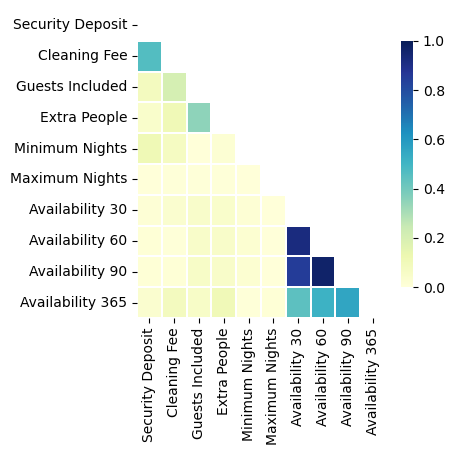

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = np.abs(train[val_rent].drop(['Features', 'Cancellation Policy'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [265]:
train[['ID']+ val_rent][['ID', 'Cancellation Policy']].groupby('Cancellation Policy', dropna = False).count()

ID
Cancellation Policy      
flexible             3243
flexible_new            7
moderate             2985
moderate_new           14
strict               4022
strict_new             28
super_strict_30        12
super_strict_60        23

In [266]:
train[['ID']+ val_rent][['ID', 'Features']].groupby('Features', dropna = False).count()

ID
Features                                               
Host Has Profile Pic                                 34
Host Has Profile Pic,Host Identity Verified          55
Host Has Profile Pic,Host Identity Verified,Ins...   17
Host Has Profile Pic,Host Identity Verified,Is ...  181
Host Has Profile Pic,Host Identity Verified,Is ...   41
...                                                 ...
Is Location Exact,Requires License                   15
Is Location Exact,Requires License,Instant Book...    5
Requires License                                     10
Requires License,Instant Bookable                     3
NaN                                                   1

[83 rows x 1 columns]

In [267]:
train[val_rent]['Features'].str.split(',').explode().drop_duplicates().tolist()

['Host Is Superhost',
 'Host Has Profile Pic',
 'Host Identity Verified',
 'Is Location Exact',
 'Requires License',
 'Instant Bookable',
 'Require Guest Profile Picture',
 'Require Guest Phone Verification',
 nan]

Las conclusiones tras observar los primeros estadísticos son:

* <u> **Security Deposit:** </u> Variable numérica que puede tener relación con el precio. Hay que codificar los datos nulos por 0 asumiendo que los no informados es que no requieren depóstio.
* <u> **Cleaning Fee:** </u> Idem al punto anterior.
* <u> **Guests Included:** </u> Variable numérica que mantendremos y con estadísticos similares a la variable Accommodates del bloque anterior. Mantenemos por si el numero de invitados tiene correlación alta con dicha variable.
* <u> **Extra People:** </u> Variable numérica que puede tener relación con el precio. No tiene valores nulos.
* <u> **Minimum Nights:** </u> Idem con el punto anterior.
* <u> **Maximum Nights:** </u> Idem con el punto anterior.
* <u> **Availability 30:** </u> Idem con el punto anterior. Presenta correlación directa y muu positiva al ser más restrictiva frente a 60, 90 y 365.
* <u> **Availability 60:** </u> Idem con el punto anterior. Presenta correlación directa con 90 y 365
* <u> **Availability 90:** </u> Idem con 365.
* <u> **Availability 365:** </u> Solo un máximo de 90 airbnb's en nuestra muestra tiene disponibilidad superior a un año. Podemos resumir la disponibilidad en una variable dicotómica o entre si es menor de 30 y mayor de 30 para resumir estas 4 últimas variables.
* <u> **Cancellation Policy:** </u> Variable tipo string que habría que codificar.
* <u> **Features:** </u> Le pasa igual que la variable Amenities del bloque anterior. Descartamos por el momento.

In [268]:
val_rent



['Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Availability 30',
 'Availability 60',
 'Availability 90',
 'Availability 365',
 'Cancellation Policy',
 'Features']

#### 2.5 Variables Relacionadas con las reseñas

In [269]:
train[['Price'] + val_res].head()

Price  Number of Reviews  Review Scores Rating  Review Scores Accuracy  \
13748   45.0                 15                  89.0                     9.0   
9656    76.0                 25                  96.0                    10.0   
1379    50.0                  5                  80.0                     8.0   
11537   23.0                  0                   NaN                     NaN   
8021    56.0                 23                  98.0                    10.0   

       Review Scores Cleanliness  Review Scores Checkin  \
13748                       10.0                   10.0   
9656                        10.0                   10.0   
1379                         8.0                    9.0   
11537                        NaN                    NaN   
8021                        10.0                   10.0   

       Review Scores Communication  Review Scores Location  \
13748                         10.0                     9.0   
9656                          10.0                    10.0   
1379                           9.0                     9.0   
11537                          NaN                     NaN   
8021                          10.0                    10.0   

       Review Scores Value  Reviews per Month  
13748                  9.0               1.61  
9656                  10.0               3.59  
1379                   8.0               0.97  
11537                  NaN                NaN  
8021                  10.0               6.22

In [270]:
custom_descibre(train[['Price'] + val_res])

count       mean        std    min    25%   50%  \
Price                        10334  73.834817  70.928807   9.00  35.00  56.0   
Number of Reviews            10334  22.705825  38.366503   0.00   1.00   7.0   
Review Scores Rating          8037  91.769192   8.886800  20.00  89.00  94.0   
Review Scores Accuracy        8020   9.423940   0.910553   2.00   9.00  10.0   
Review Scores Cleanliness     8024   9.338360   0.968039   2.00   9.00  10.0   
Review Scores Checkin         8011   9.626514   0.789011   2.00   9.00  10.0   
Review Scores Communication   8025   9.648100   0.762748   2.00   9.00  10.0   
Review Scores Location        8009   9.549757   0.763525   2.00   9.00  10.0   
Review Scores Value           8008   9.225400   0.939546   2.00   9.00   9.0   
Reviews per Month             8148   1.864948   1.868944   0.02   0.45   1.2   

                               75%     max  nulls      Corr  
Price                        89.00  969.00      0  1.000000  
Number of Reviews            27.00  446.00      0 -0.061589  
Review Scores Rating         98.00  100.00   2297  0.067228  
Review Scores Accuracy       10.00   10.00   2314  0.065418  
Review Scores Cleanliness    10.00   10.00   2310  0.084215  
Review Scores Checkin        10.00   10.00   2323 -0.004555  
Review Scores Communication  10.00   10.00   2309  0.006063  
Review Scores Location       10.00   10.00   2325  0.106880  
Review Scores Value          10.00   10.00   2326  0.021906  
Reviews per Month             2.74   17.21   2186 -0.095557

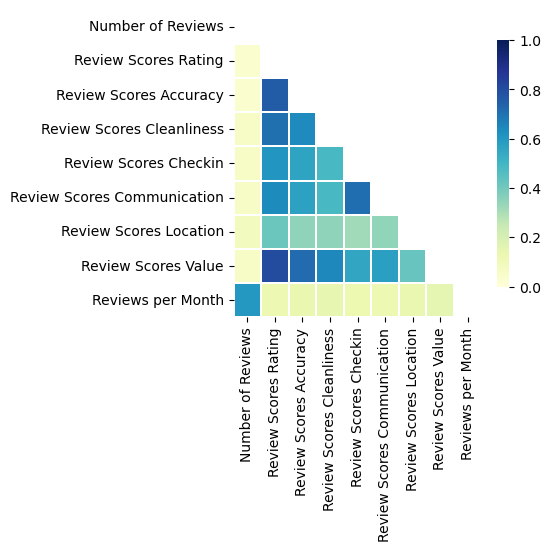

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = np.abs(train[val_res].corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Todas las variables del bloque de reseñas son de tipo numérico con aproximádamente el mismo número de missings. Es de suponer que al hacer una reseña, opinas sobre todos los aspectos y cuando no haces reseña el valor queda como nulo. En general pueden aportar mucha información relacionada con la calidad del alojamiento y servicio pero hay 2 que sobresalen por encima del resto con una correlación por encima de lo normal: Review Scores Value y Review Scores Rating que como su propio nombre indica parece que es una nota de reseña general. Son 2 que mantenendremos en el análisis hasta un análisis de correlaciones posterior donde decidiremos cual puede desempeñar un poco mejor.

#### 3. Preprocesamiento

En base al análisis exploratorio de las variables por grupo, procederemos a codificar aquellas que son de interés para la estimación del precio y las que no lo son, eliminaremos de forma manual. Posteriormente con el set de variables "candidatas" ejecutaremos un método de selección de variables y evaluaremos en su conjunto.

El primer punto será obtener un nuevo dataframe train con las variables candidatas.

In [272]:
variables_candidatas = ['ID', 'Price', 'Host Response Rate', 'Host Total Listings Count', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 
                        'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 
                        'Availability 365', 'Cancellation Policy', 'Review Scores Value', 'Review Scores Rating']
train_pre_process = train[variables_candidatas]

In [273]:
test_pre_process = test[variables_candidatas]

Hasta este punto hemos reducido el dataset de 89 columnas a 24 columnas. Lo ideal sería habernos juntado con negocio (el owner del modelo dentro de la empresa Airbnb) para indicar cuales son las variables bajo su criterio que más aportan en la definición del precio para no descartarlas en esta primera selección del analista.

In [274]:
train_pre_process.head()

ID  Price  Host Response Rate  Host Total Listings Count  \
13748  13095346   45.0               100.0                        1.0   
9656   14438745   76.0               100.0                        4.0   
1379   14853284   50.0               100.0                       11.0   
11537  13149669   23.0                 NaN                        1.0   
8021   16119061   56.0               100.0                        1.0   

        Latitude  Longitude Property Type        Room Type  Accommodates  \
13748  40.406915  -3.705853     Apartment  Entire home/apt             2   
9656   39.572762   2.647736     Apartment  Entire home/apt             2   
1379   40.407502  -3.699373     Apartment  Entire home/apt             4   
11537  40.396398  -3.706252     Apartment     Private room             1   
8021   40.408940  -3.698995     Apartment  Entire home/apt             3   

       Bathrooms  ...  Extra People  Minimum Nights Maximum Nights  \
13748        1.0  ...             0               2           1125   
9656         1.0  ...             0               3           1125   
1379         1.0  ...            10               1           1125   
11537        1.0  ...             0               2           1125   
8021         1.0  ...             0               1           1125   

       Availability 30  Availability 60  Availability 90  Availability 365  \
13748                4               10               34               309   
9656                 6               15               30               201   
1379                12               38               61               231   
11537                0                0                0                 0   
8021                 1                3                8                80   

       Cancellation Policy  Review Scores Value  Review Scores Rating  
13748             moderate                  9.0                  89.0  
9656                strict                 10.0                  96.0  
1379                strict                  8.0                  80.0  
11537             flexible                  NaN                   NaN  
8021              moderate                 10.0                  98.0  

[5 rows x 26 columns]

#### 3.1 Transformación de variables tipo string a numéricas.

Como por lo general el kernel de los modelos no admite información tipo string, procedemos a codificar las variables. Hacerlo asignando un valor aleatorio a cada categoría carece de sentido ya que los números carecedrían de magnitud por lo que vamos a intentar según una representación vectorial o estudiando la variable dependiente en la independiente (target encoding).

In [275]:
#train_pre_process['Property Type'].unique()
#train_pre_process['Room Type'].unique()
#train_pre_process['Bed Type'].unique()
#train_pre_process['Cancellation Policy'].unique()

##### 3.1.1 Método TargetEncoding

In [276]:
categorical = ['Property Type', 'Cancellation Policy']

mean_map = {}
for c in categorical:
    mean = train_pre_process.groupby(c)['Price'].mean()
    train_pre_process[c] = train_pre_process[c].map(mean)    
    mean_map[c] = mean

train_pre_process.head()

/var/folders/d8/h7vq_8mj2cb1xct1mmr_np640000gn/T/ipykernel_870/3501264329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pre_process[c] = train_pre_process[c].map(mean)
/var/folders/d8/h7vq_8mj2cb1xct1mmr_np640000gn/T/ipykernel_870/3501264329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pre_process[c] = train_pre_process[c].map(mean)


ID  Price  Host Response Rate  Host Total Listings Count  \
13748  13095346   45.0               100.0                        1.0   
9656   14438745   76.0               100.0                        4.0   
1379   14853284   50.0               100.0                       11.0   
11537  13149669   23.0                 NaN                        1.0   
8021   16119061   56.0               100.0                        1.0   

        Latitude  Longitude  Property Type        Room Type  Accommodates  \
13748  40.406915  -3.705853      72.334648  Entire home/apt             2   
9656   39.572762   2.647736      72.334648  Entire home/apt             2   
1379   40.407502  -3.699373      72.334648  Entire home/apt             4   
11537  40.396398  -3.706252      72.334648     Private room             1   
8021   40.408940  -3.698995      72.334648  Entire home/apt             3   

       Bathrooms  ...  Extra People  Minimum Nights Maximum Nights  \
13748        1.0  ...             0               2           1125   
9656         1.0  ...             0               3           1125   
1379         1.0  ...            10               1           1125   
11537        1.0  ...             0               2           1125   
8021         1.0  ...             0               1           1125   

       Availability 30  Availability 60  Availability 90  Availability 365  \
13748                4               10               34               309   
9656                 6               15               30               201   
1379                12               38               61               231   
11537                0                0                0                 0   
8021                 1                3                8                80   

       Cancellation Policy  Review Scores Value  Review Scores Rating  
13748            65.127638                  9.0                  89.0  
9656             86.473396                 10.0                  96.0  
1379             86.473396                  8.0                  80.0  
11537            64.776750                  NaN                   NaN  
8021             65.127638                 10.0                  98.0  

[5 rows x 26 columns]

La misma transformación hay que ejecutarla sobre la muestra test

In [277]:
for c in categorical:
    test_pre_process[c] = test_pre_process[c].map(mean_map[c])

/var/folders/d8/h7vq_8mj2cb1xct1mmr_np640000gn/T/ipykernel_870/1413797619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pre_process[c] = test_pre_process[c].map(mean_map[c])
/var/folders/d8/h7vq_8mj2cb1xct1mmr_np640000gn/T/ipykernel_870/1413797619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pre_process[c] = test_pre_process[c].map(mean_map[c])


##### 3.1.2 Método Vectorial (Etiquetar con un orden)

In [278]:
mapping_room = {'Entire home/apt': 3, 'Private room': 2, 'Shared room': 1}

train_pre_process['Room Type'] = train_pre_process['Room Type'].map(mapping_room)

/var/folders/d8/h7vq_8mj2cb1xct1mmr_np640000gn/T/ipykernel_870/1860777513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pre_process['Room Type'] = train_pre_process['Room Type'].map(mapping_room)


In [279]:
mapping_bed = {'Real Bed': 5, 'Pull-out Sofa': 4, 'Futon': 3, 'Couch': 2, 'Airbed': 1} # Quien prefiere dormir en una colchoneta de aire antes que en una cama de verdad?

train_pre_process['Bed Type'] = train_pre_process['Bed Type'].map(mapping_bed)

/var/folders/d8/h7vq_8mj2cb1xct1mmr_np640000gn/T/ipykernel_870/2466662628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pre_process['Bed Type'] = train_pre_process['Bed Type'].map(mapping_bed)


Igual que con el otro método, las transformaciones numéricas hay que realizarlas también en la muestra test.

In [306]:
test_pre_process['Room Type'] = test_pre_process['Room Type'].map(mapping_room)
test_pre_process['Bed Type'] = test_pre_process['Bed Type'].map(mapping_bed)

In [281]:
train_pre_process.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10334 entries, 13748 to 11196
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         10334 non-null  int64  
 1   Price                      10334 non-null  float64
 2   Host Response Rate         9012 non-null   float64
 3   Host Total Listings Count  10332 non-null  float64
 4   Latitude                   10334 non-null  float64
 5   Longitude                  10334 non-null  float64
 6   Property Type              10334 non-null  float64
 7   Room Type                  10334 non-null  int64  
 8   Accommodates               10334 non-null  int64  
 9   Bathrooms                  10300 non-null  float64
 10  Bedrooms                   10318 non-null  float64
 11  Beds                       10307 non-null  float64
 12  Bed Type                   10334 non-null  int64  
 13  Security Deposit           4413 non-null   floa

In [282]:
custom_descibre(train_pre_process)

count          mean           std           min  \
ID                         10334  1.028419e+07  5.559048e+06  18628.000000   
Price                      10334  7.383482e+01  7.092881e+01      9.000000   
Host Response Rate          9012  9.496316e+01  1.482535e+01      0.000000   
Host Total Listings Count  10332  1.244599e+01  3.384916e+01      0.000000   
Latitude                   10334  4.050578e+01  4.495461e+00    -37.851182   
Longitude                  10334 -3.910722e+00  1.401564e+01   -123.131344   
Property Type              10334  7.383482e+01  1.246837e+01     16.000000   
Room Type                  10334  2.599574e+00  5.156074e-01      1.000000   
Accommodates               10334  3.296787e+00  2.109615e+00      1.000000   
Bathrooms                  10300  1.285485e+00  6.615822e-01      0.000000   
Bedrooms                   10318  1.350746e+00  9.081950e-01      0.000000   
Beds                       10307  2.061415e+00  1.631491e+00      1.000000   
Bed Type                   10334  4.970002e+00  2.218799e-01      1.000000   
Security Deposit            4413  1.885738e+02  1.135373e+02      0.000000   
Cleaning Fee                6153  3.149716e+01  2.840707e+01      0.000000   
Guests Included            10334  1.597736e+00  1.181521e+00      0.000000   
Extra People               10334  7.582059e+00  1.114167e+01      0.000000   
Minimum Nights             10334  3.069286e+00  1.378001e+01      1.000000   
Maximum Nights             10334  9.788861e+02  1.003467e+04      1.000000   
Availability 30            10334  8.924037e+00  9.250733e+00      0.000000   
Availability 60            10334  2.302361e+01  1.960650e+01      0.000000   
Availability 90            10334  3.991523e+01  2.947673e+01      0.000000   
Availability 365           10334  2.031524e+02  1.277369e+02      0.000000   
Cancellation Policy        10334  7.383482e+01  1.244158e+01     64.500000   
Review Scores Value         8008  9.225400e+00  9.395461e-01      2.000000   
Review Scores Rating        8037  9.176919e+01  8.886800e+00     20.000000   

                                    25%           50%           75%  \
ID                         5.615668e+06  1.136236e+07  1.531121e+07   
Price                      3.500000e+01  5.600000e+01  8.900000e+01   
Host Response Rate         1.000000e+02  1.000000e+02  1.000000e+02   
Host Total Listings Count  1.000000e+00  2.000000e+00  6.000000e+00   
Latitude                   4.040992e+01  4.041972e+01  4.043097e+01   
Longitude                 -3.707628e+00 -3.700665e+00 -3.683676e+00   
Property Type              7.233465e+01  7.233465e+01  7.233465e+01   
Room Type                  2.000000e+00  3.000000e+00  3.000000e+00   
Accommodates               2.000000e+00  3.000000e+00  4.000000e+00   
Bathrooms                  1.000000e+00  1.000000e+00  1.000000e+00   
Bedrooms                   1.000000e+00  1.000000e+00  2.000000e+00   
Beds                       1.000000e+00  2.000000e+00  2.000000e+00   
Bed Type                   5.000000e+00  5.000000e+00  5.000000e+00   
Security Deposit           1.000000e+02  1.500000e+02  2.000000e+02   
Cleaning Fee               1.500000e+01  2.500000e+01  4.000000e+01   
Guests Included            1.000000e+00  1.000000e+00  2.000000e+00   
Extra People               0.000000e+00  0.000000e+00  1.500000e+01   
Minimum Nights             1.000000e+00  2.000000e+00  3.000000e+00   
Maximum Nights             3.650000e+02  1.125000e+03  1.125000e+03   
Availability 30            0.000000e+00  6.000000e+00  1.400000e+01   
Availability 60            5.000000e+00  2.000000e+01  3.800000e+01   
Availability 90            1.200000e+01  3.800000e+01  6.500000e+01   
Availability 365           8.000000e+01  2.420000e+02  3.200000e+02   
Cancellation Policy        6.477675e+01  6.512764e+01  8.647340e+01   
Review Scores Value        9.000000e+00  9.000000e+00  1.000000e+01   
Review Scores Rating       8.900000e+01  9.400000e+01  9.800000e+01   

  

#### 3.2 Tratamiento de valores nulos

Es crucial el tratamiento de valores nulos ya que muchos algoritmos no permiten su manejo dentro del kernel. Observando la tabla anterior, hay algunos que nulos que podemos codificar y otros que no.
Las variables que se refieren a comisiones o depósitos, la ausencia de información podemos asumir que es porque no existe y el valor nulo lo podemos codificar como 0.
En otros casos como es en las reseñas, asignar un valor implicaría alterar el la muestra de datos por lo que la opción más segura es eliminar dichas observaciones esperando que mitiguen el resto de missing de otras variables.

In [283]:
train_pre_process['Security Deposit'] = train_pre_process['Security Deposit'].fillna(0)
train_pre_process['Cleaning Fee'] = train_pre_process['Cleaning Fee'].fillna(0)
train_pre_process['Bathrooms'] = train_pre_process['Bathrooms'].fillna(0)
train_pre_process['Bedrooms'] = train_pre_process['Bedrooms'].fillna(0)
train_pre_process['Beds'] = train_pre_process['Beds'].fillna(0)
train_pre_process = train_pre_process[~train_pre_process['Review Scores Value'].isnull()]
train_pre_process = train_pre_process[~train_pre_process['Review Scores Rating'].isnull()]
train_pre_process = train_pre_process[~train_pre_process['Host Response Rate'].isnull()]

/var/folders/d8/h7vq_8mj2cb1xct1mmr_np640000gn/T/ipykernel_870/3241544691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pre_process['Security Deposit'] = train_pre_process['Security Deposit'].fillna(0)
/var/folders/d8/h7vq_8mj2cb1xct1mmr_np640000gn/T/ipykernel_870/3241544691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pre_process['Cleaning Fee'] = train_pre_process['Cleaning Fee'].fillna(0)
/var/folders/d8/h7vq_8mj2cb1xct1mmr_np640000gn/T/ipykernel_870/3241544691.py:3: SettingWithC

In [284]:
custom_descibre(train_pre_process)

count          mean           std           min  \
ID                          7490  9.551554e+06  5.468633e+06  18628.000000   
Price                       7490  7.084820e+01  5.898406e+01     10.000000   
Host Response Rate          7490  9.589439e+01  1.260293e+01      0.000000   
Host Total Listings Count   7490  1.059279e+01  2.892227e+01      0.000000   
Latitude                    7490  4.058955e+01  3.258399e+00    -37.851182   
Longitude                   7490 -4.250356e+00  1.257394e+01   -122.430775   
Property Type               7490  7.351041e+01  1.198899e+01     20.000000   
Room Type                   7490  2.649666e+00  4.997962e-01      1.000000   
Accommodates                7490  3.466088e+00  2.099154e+00      1.000000   
Bathrooms                   7490  1.259079e+00  6.050382e-01      0.000000   
Bedrooms                    7490  1.363685e+00  9.143682e-01      0.000000   
Beds                        7490  2.142190e+00  1.654879e+00      0.000000   
Bed Type                    7490  4.968224e+00  2.277449e-01      1.000000   
Security Deposit            7490  8.537143e+01  1.155286e+02      0.000000   
Cleaning Fee                7490  1.996662e+01  2.474736e+01      0.000000   
Guests Included             7490  1.709479e+00  1.216339e+00      0.000000   
Extra People                7490  8.420160e+00  1.033773e+01      0.000000   
Minimum Nights              7490  2.574099e+00  4.126705e+00      1.000000   
Maximum Nights              7490  1.007375e+03  1.172774e+04      1.000000   
Availability 30             7490  8.596395e+00  8.058248e+00      0.000000   
Availability 60             7490  2.316849e+01  1.746380e+01      0.000000   
Availability 90             7490  4.083965e+01  2.623292e+01      0.000000   
Availability 365            7490  2.173984e+02  1.174601e+02      0.000000   
Cancellation Policy         7490  7.454556e+01  1.236492e+01     64.500000   
Review Scores Value         7490  9.222029e+00  9.268740e-01      2.000000   
Review Scores Rating        7490  9.179653e+01  8.533361e+00     20.000000   

                                    25%           50%           75%  \
ID                         4.675706e+06  1.013854e+07  1.453953e+07   
Price                      3.500000e+01  5.900000e+01  8.500000e+01   
Host Response Rate         1.000000e+02  1.000000e+02  1.000000e+02   
Host Total Listings Count  1.000000e+00  2.000000e+00  6.000000e+00   
Latitude                   4.041012e+01  4.041934e+01  4.042925e+01   
Longitude                 -3.707323e+00 -3.700918e+00 -3.688389e+00   
Property Type              7.233465e+01  7.233465e+01  7.233465e+01   
Room Type                  2.000000e+00  3.000000e+00  3.000000e+00   
Accommodates               2.000000e+00  3.000000e+00  4.000000e+00   
Bathrooms                  1.000000e+00  1.000000e+00  1.000000e+00   
Bedrooms                   1.000000e+00  1.000000e+00  2.000000e+00   
Beds                       1.000000e+00  2.000000e+00  3.000000e+00   
Bed Type                   5.000000e+00  5.000000e+00  5.000000e+00   
Security Deposit           0.000000e+00  0.000000e+00  1.500000e+02   
Cleaning Fee               0.000000e+00  1.500000e+01  3.000000e+01   
Guests Included            1.000000e+00  1.000000e+00  2.000000e+00   
Extra People               0.000000e+00  8.000000e+00  1.500000e+01   
Minimum Nights             1.000000e+00  2.000000e+00  3.000000e+00   
Maximum Nights             3.600000e+02  1.125000e+03  1.125000e+03   
Availability 30            2.000000e+00  7.000000e+00  1.300000e+01   
Availability 60            8.000000e+00  2.100000e+01  3.600000e+01   
Availability 90            1.900000e+01  4.000000e+01  6.200000e+01   
Availability 365           1.070000e+02  2.610000e+02  3.200000e+02   
Cancellation Policy        6.512764e+01  6.512764e+01  8.647340e+01   
Review Scores Value        9.000000e+00  9.000000e+00  1.000000e+01   
Review Scores Rating       8.900000e+01  9.400000e+01  9.800000e+01   

  

In [285]:
test_pre_process['Security Deposit'] = test_pre_process['Security Deposit'].fillna(0)
test_pre_process['Cleaning Fee'] = test_pre_process['Cleaning Fee'].fillna(0)
test_pre_process['Bathrooms'] = test_pre_process['Bathrooms'].fillna(0)
test_pre_process['Bedrooms'] = test_pre_process['Bedrooms'].fillna(0)
test_pre_process['Beds'] = test_pre_process['Beds'].fillna(0)
test_pre_process = test_pre_process[~test_pre_process['Review Scores Value'].isnull()]
test_pre_process = test_pre_process[~test_pre_process['Review Scores Rating'].isnull()]
test_pre_process = test_pre_process[~test_pre_process['Host Response Rate'].isnull()]

/var/folders/d8/h7vq_8mj2cb1xct1mmr_np640000gn/T/ipykernel_870/1127524043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pre_process['Security Deposit'] = test_pre_process['Security Deposit'].fillna(0)
/var/folders/d8/h7vq_8mj2cb1xct1mmr_np640000gn/T/ipykernel_870/1127524043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pre_process['Cleaning Fee'] = test_pre_process['Cleaning Fee'].fillna(0)
/var/folders/d8/h7vq_8mj2cb1xct1mmr_np640000gn/T/ipykernel_870/1127524043.py:3: SettingWithCopyW

In [286]:
custom_descibre(test_pre_process)

count          mean           std           min  \
ID                          3209  9.611917e+06  5.458469e+06  19864.000000   
Price                       3209  7.088283e+01  6.776080e+01      9.000000   
Host Response Rate          3209  9.586725e+01  1.325726e+01      0.000000   
Host Total Listings Count   3209  1.027641e+01  2.905478e+01      0.000000   
Latitude                    3209  4.060041e+01  3.589058e+00    -37.839439   
Longitude                   3209 -4.212896e+00  1.315122e+01   -122.385481   
Property Type               3209  7.358171e+01  1.233539e+01     16.000000   
Accommodates                3209  3.384232e+00  2.075811e+00      1.000000   
Bathrooms                   3209  1.245248e+00  6.062306e-01      0.000000   
Bedrooms                    3209  1.332814e+00  8.825255e-01      0.000000   
Beds                        3209  2.083203e+00  1.613610e+00      0.000000   
Security Deposit            3209  8.433063e+01  1.197852e+02      0.000000   
Cleaning Fee                3209  1.947024e+01  2.696377e+01      0.000000   
Guests Included             3209  1.675288e+00  1.242640e+00      1.000000   
Extra People                3209  8.415706e+00  1.244579e+01      0.000000   
Minimum Nights              3209  2.661577e+00  4.158205e+00      1.000000   
Maximum Nights              3209  8.403450e+02  7.853374e+02      1.000000   
Availability 30             3209  8.710813e+00  8.310256e+00      0.000000   
Availability 60             3209  2.316111e+01  1.786498e+01      0.000000   
Availability 90             3209  4.066656e+01  2.671207e+01      0.000000   
Availability 365            3209  2.145952e+02  1.180998e+02      0.000000   
Cancellation Policy         3209  7.441930e+01  1.219802e+01     64.500000   
Review Scores Value         3209  9.210034e+00  9.472425e-01      2.000000   
Review Scores Rating        3209  9.162917e+01  8.886243e+00     20.000000   

                                    25%           50%           75%  \
ID                         4.800438e+06  1.006374e+07  1.464734e+07   
Price                      3.500000e+01  5.700000e+01  8.500000e+01   
Host Response Rate         1.000000e+02  1.000000e+02  1.000000e+02   
Host Total Listings Count  1.000000e+00  2.000000e+00  5.000000e+00   
Latitude                   4.040947e+01  4.041764e+01  4.042911e+01   
Longitude                 -3.707181e+00 -3.701047e+00 -3.689135e+00   
Property Type              7.233465e+01  7.233465e+01  7.233465e+01   
Accommodates               2.000000e+00  3.000000e+00  4.000000e+00   
Bathrooms                  1.000000e+00  1.000000e+00  1.000000e+00   
Bedrooms                   1.000000e+00  1.000000e+00  2.000000e+00   
Beds                       1.000000e+00  2.000000e+00  2.000000e+00   
Security Deposit           0.000000e+00  0.000000e+00  1.500000e+02   
Cleaning Fee               0.000000e+00  1.500000e+01  3.000000e+01   
Guests Included            1.000000e+00  1.000000e+00  2.000000e+00   
Extra People               0.000000e+00  5.000000e+00  1.500000e+01   
Minimum Nights             1.000000e+00  2.000000e+00  3.000000e+00   
Maximum Nights             3.300000e+02  1.125000e+03  1.125000e+03   
Availability 30            2.000000e+00  7.000000e+00  1.300000e+01   
Availability 60            7.000000e+00  2.100000e+01  3.700000e+01   
Availability 90            1.900000e+01  4.000000e+01  6.200000e+01   
Availability 365           1.030000e+02  2.560000e+02  3.180000e+02   
Cancellation Policy        6.477675e+01  6.512764e+01  8.647340e+01   
Review Scores Value        9.000000e+00  9.000000e+00  1.000000e+01   
Review Scores Rating       8.900000e+01  9.400000e+01  9.800000e+01   

                                    max  nulls      Corr  
ID                         1.910969e+07      0  1.000000  
Price                      9.990000e+02      0 -0.080498  
Host Response Rate         1.000000e+02      0  0.032220  
Host Total Listings Count  2.070000e+02      0 -0.041333  
Latit

La muestra de entrenamiento ha quedado limpia pasando de un total de 10334 observaciones a 7490.

#### 3.3 Selección de Variables

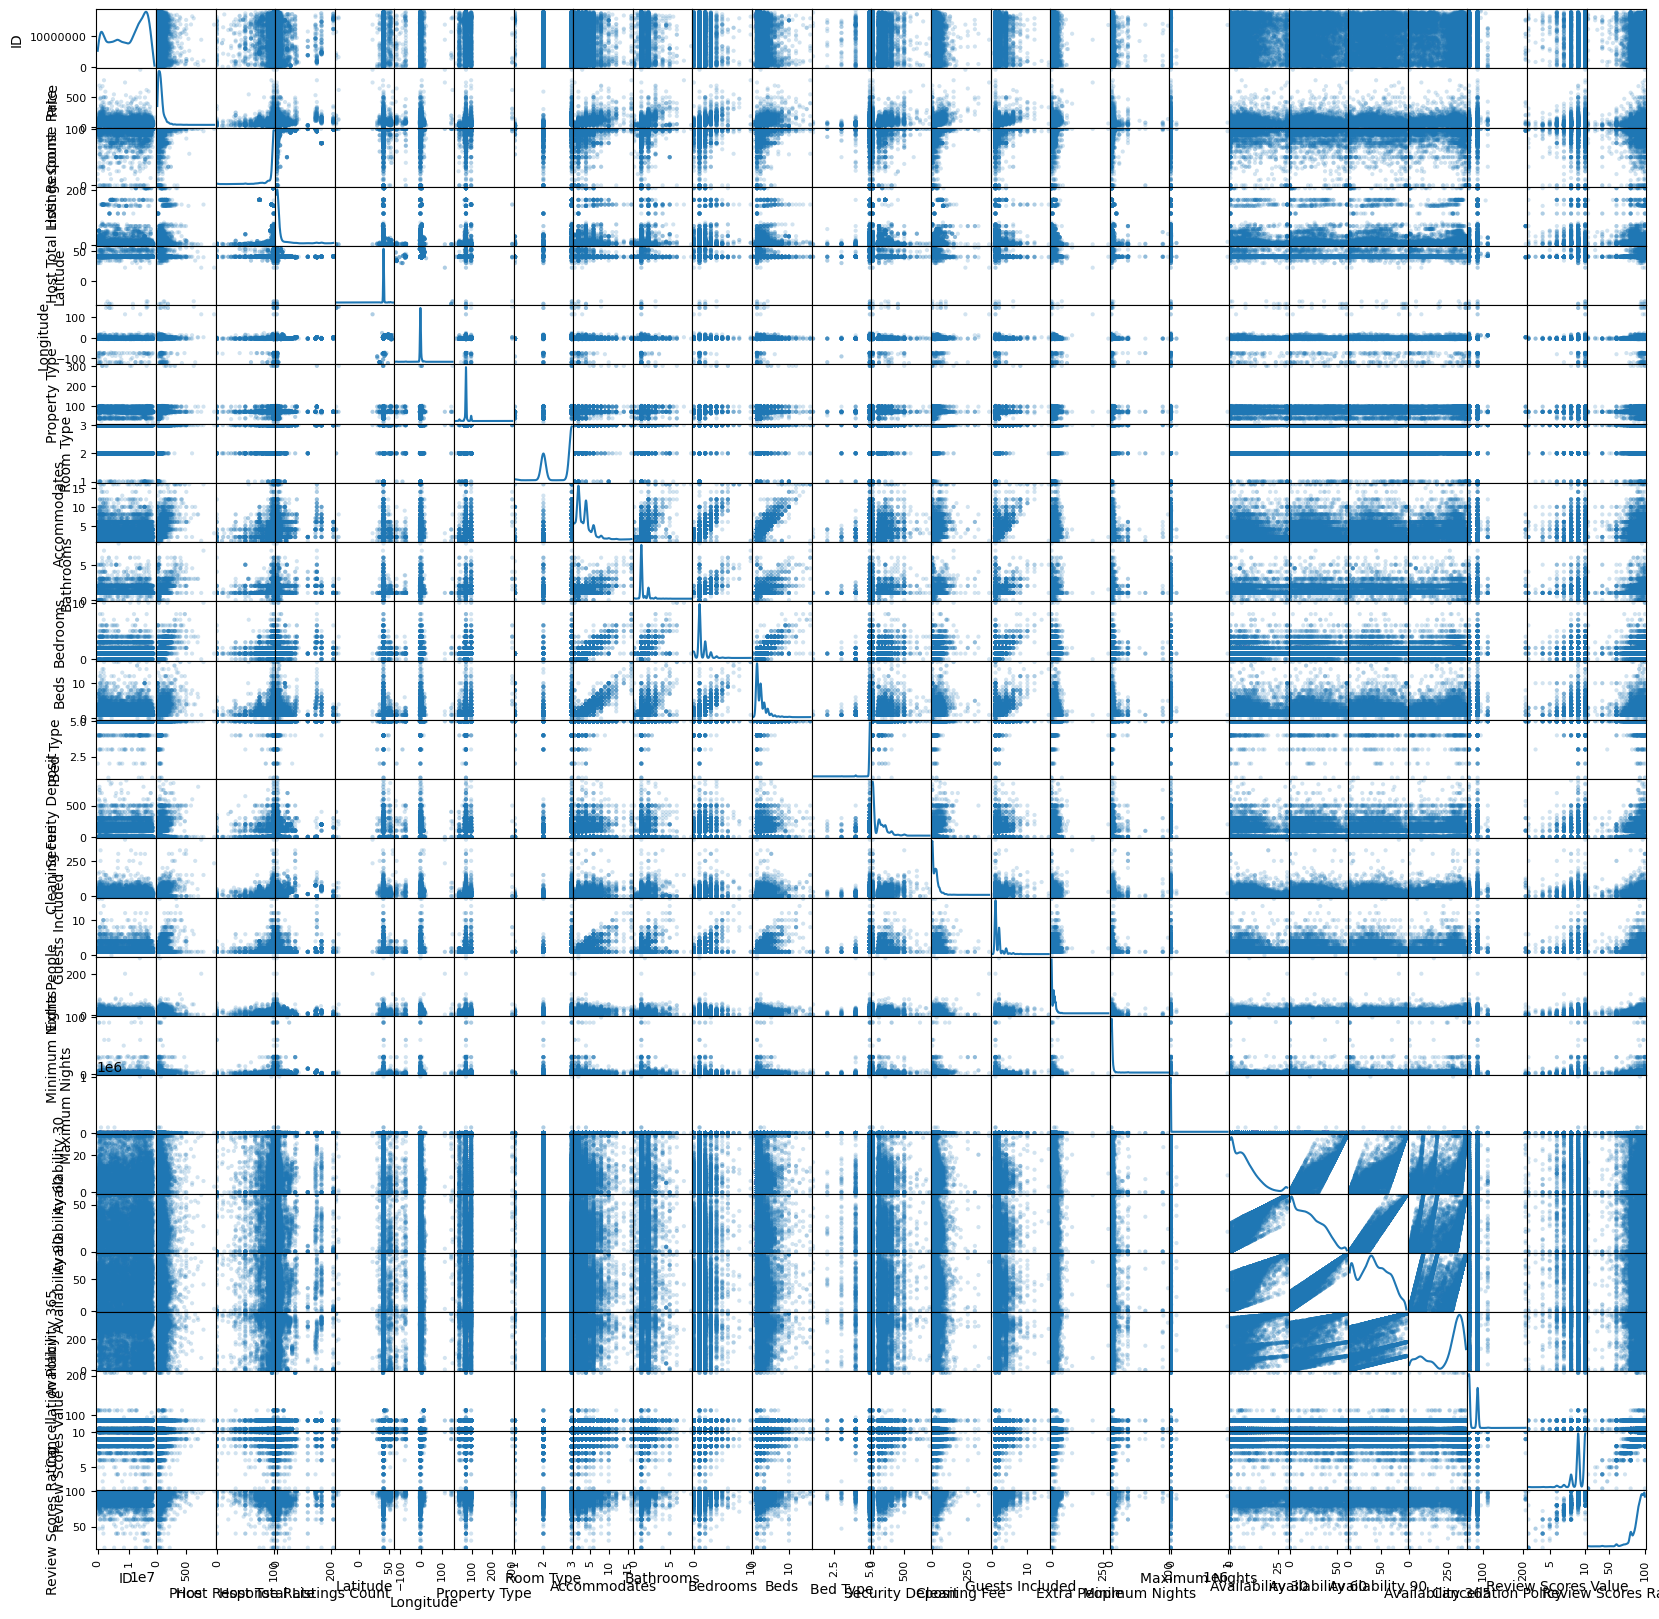

In [287]:
pd.plotting.scatter_matrix(train_pre_process, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

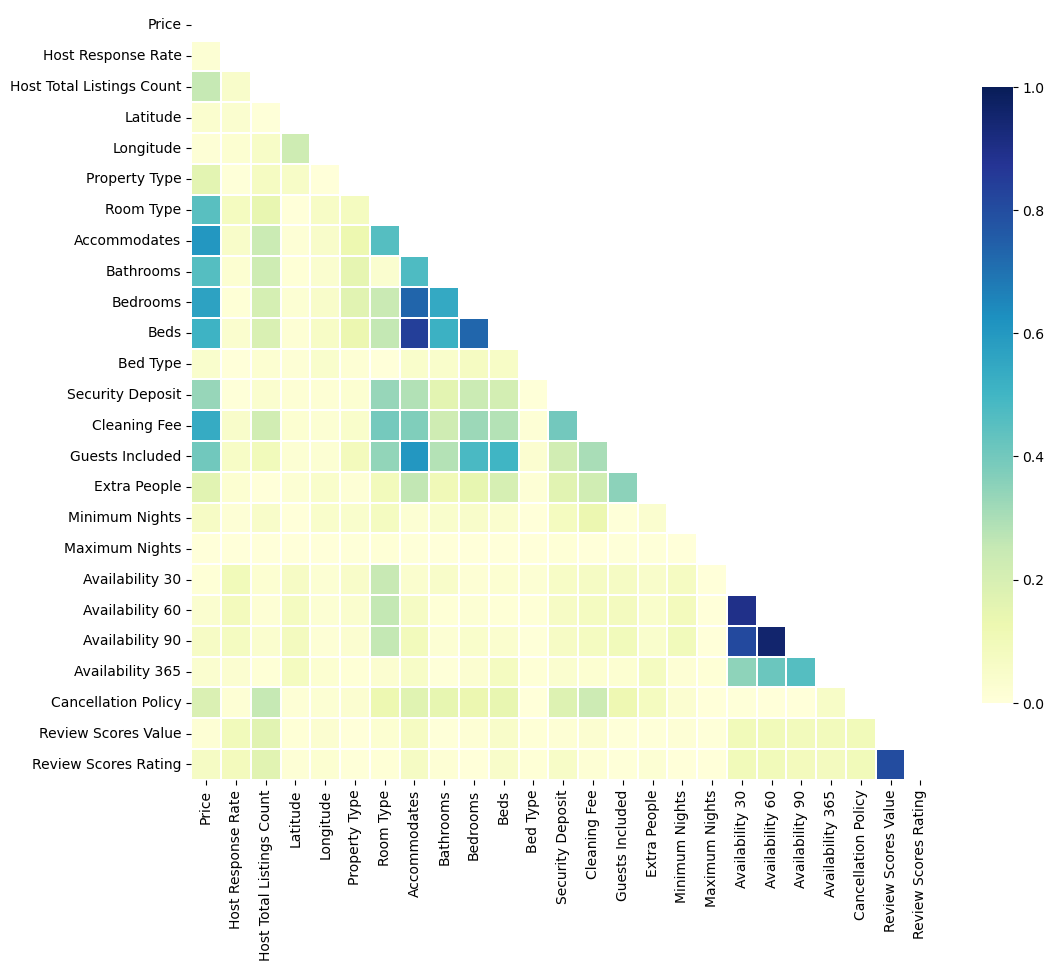

In [288]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(train_pre_process.drop(['ID'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

##### 3.3.1 Selección de variables método Lasso

In [289]:
from sklearn.linear_model import LassoCV


X = train_pre_process.iloc[:, 2:]
y = train_pre_process['Price']

lasso = LassoCV(cv=5, random_state=420)
lasso.fit(X, y)

print(X.columns[lasso.coef_ !=0])

Index(['Host Response Rate', 'Host Total Listings Count', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Security Deposit', 'Cleaning Fee', 'Extra People',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Cancellation Policy',
       'Review Scores Rating'],
      dtype='object')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .......................................alpha=0.0001; total time=   0.2s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00014563484775012445; total time=   0.0s
[CV] END .......................alpha=0.0001456

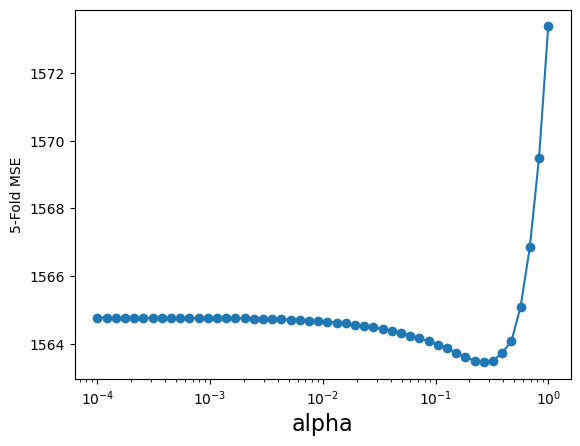

In [290]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

X = train_pre_process.iloc[:, 2:]
y = train_pre_process['Price']

alpha_vector = np.logspace(-4, 0, 50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X, y)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

##### 3.3.2 Selección de variables método Random Forest

In [291]:
from sklearn.ensemble import RandomForestRegressor

X = train_pre_process.iloc[:, 2:]
y = train_pre_process['Price']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)

selected_features_rf = importances[importances > 0.01].index.tolist()

print("Variables seleccionadas por Random Forest:", selected_features_rf)

Variables seleccionadas por Random Forest: ['Host Total Listings Count', 'Latitude', 'Longitude', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Review Scores Rating']


In [307]:
variables_depuradas = ['Host Response Rate', 'Host Total Listings Count', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 365', 'Cancellation Policy', 'Review Scores Value', 'Review Scores Rating']
train_depurado = train_pre_process[variables_depuradas]

test_depurado = test_pre_process[variables_depuradas]
y_test = test_pre_process['Price']

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.3s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.1s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00012067926406393288; total time=   0.0s
[CV] END .......................alpha=0.00014563484775012445; total time=   0.0s
[CV] END .......................alpha=0.0001456

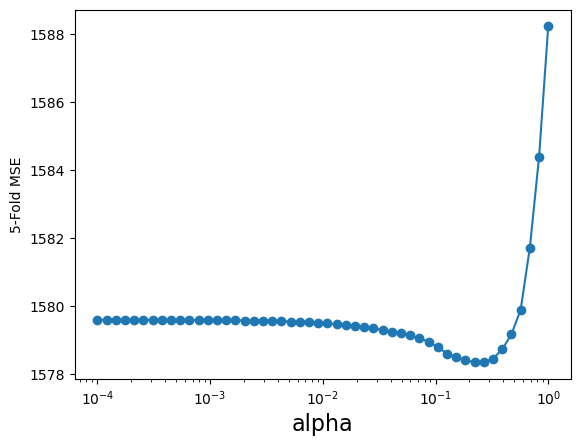

In [293]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

X = train_depurado
y = train_pre_process['Price']

alpha_vector = np.logspace(-4, 0, 50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X, y)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

A la vista de la información por ambos métodos de selección de variables y una primera aproximación de validación cruzada, observamos un error cuadrático medio para el precio alto lo que indica que el modelo tendrá un mal rendimiento.
Procedemos a omitir por el momento las variables relacionadas con la longitud, latitud y nos quedamos solo con la métrica de availability 365 que corresponde con el numero de días que el Airbnb está libre en el próximo año. Con esto probamos distintos tipos de modelos de regresión.

#### 4 Modelado

Probamos varios modelos vistos en clase que se puedan utilizar para un problema de regressión a la variable Precio del Airbnb

In [294]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{name}: MSE promedio: {np.mean(-scores)}")

Linear Regression: MSE promedio: 1579.5895209919968
Ridge: MSE promedio: 1579.5887484066648
Random Forest: MSE promedio: 1174.6948082910546
Gradient Boosting: MSE promedio: 1151.0516081177943


In [295]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print(f"Mejor MSE: {-grid_search.best_score_}")
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Mejor MSE: 1159.1484671133462
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


In [296]:
from sklearn.svm import SVR

vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X, y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ................................C=0.01, gamma=1e-05; total time=   4.3s
[CV] END ................................C=0.01, gamma=1e-05; total time=   5.9s
[CV] END ................................C=0.01, gamma=1e-05; total time=   4.5s
[CV] END ................................C=0.01, gamma=1e-05; total time=   3.4s
[CV] END ................................C=0.01, gamma=1e-05; total time=   3.6s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   5.4s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   5.4s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   6.6s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   6.0s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   5.4s
[CV] END ................C=0.01, gamma=0.0005179474679231213; total time=   3.4s
[CV] END ................C=0.01, gamma=0.000517

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 7.19685673e-05, 5.17947468e-04, 3.72759372e-03,
       2.68269580e-02, 1.93069773e-01, 1.38949549e+00, 1.00000000e+01])},
             verbose=2)

best mean cross-validation score: 0.426
best parameters: {'C': 100.0, 'gamma': 7.196856730011514e-05}
Gamma en la gráfica:  -4.142857142857143
C en la gráfica:  2.0


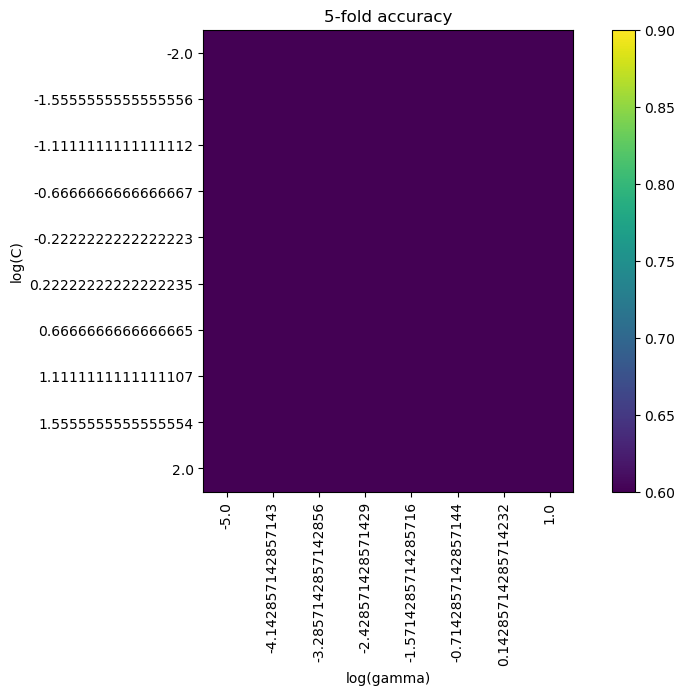

In [297]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("Gamma en la gráfica: ", np.log10(grid.best_params_['gamma']))
print("C en la gráfica: ", np.log10(grid.best_params_['C']))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [309]:

Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']


svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(X,y)
print(f'Acc (TEST): {svmModel.score(test_depurado,y_test):0.2f}')

Acc (TEST): 0.37


Hasta el momento se han probado distintos modelos que presentan un error cuadratico medio elevado. Hay que tener en cuenta que la unidad de la variable objetico es en euros y un error superior a 1000 tiene mucha importancia. Es posible que el error se deba a que las variables presentan escalas muy distintas entre si y con respecto al precio. 
Como las relaciones entre variables no son del todo lineales, también aumenta el MSE.

Aunque ya hemos probado algunos modelos no lineales como el Random Forest, vamos a probar a normalizar el conjunto de muestreo de entrenamiento con un modelo XGBoost.

#### Probando XG BOOST

In [310]:
from xgboost import XGBRegressor

bt = XGBRegressor(random_state=0, max_depth=3,learning_rate=0.01, n_estimators=500)
bt.fit(X,y)

print("Train: ",bt.score(X,y))
print("Test: ",bt.score(test_depurado,y_test))

Train:  0.7332512365257551
Test:  0.6574167164493763


Parece que un modelo de este estilo estima mejor que los anteriores el precio en la muestra de entrenamiento y de test. Desarrollamos un poco más el modelo. Lo primero para mitigar el problema detectado anteriormente, es escalar las variables.

In [311]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test_depurado)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=420)


In [312]:
xg_reg.fit(X_train_scaled, y)

y_pred = xg_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE del modelo XGBoost: {rmse}")

RMSE del modelo XGBoost: 38.76853434245305


El error ha disminuido con respecto a los modelos anteriores principalmente por la escala transformada. Vamos a realizar un GridSearchCV para encontrar la mejor combinación de parámetros que optimicen el modelo.

In [313]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=420)

grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train_scaled, y)

print(f"Mejores parámetros: {grid_search.best_params_}")

best_xgboost = grid_search.best_estimator_
y_pred_best = best_xgboost.predict(X_test_scaled)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

print(f"RMSE del mejor modelo XGBoost: {rmse_best}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
RMSE del mejor modelo XGBoost: 37.326463444319636


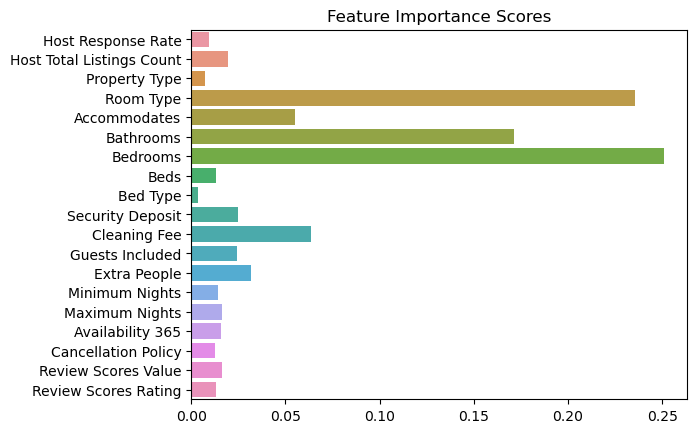

In [314]:
feature_importances = best_xgboost.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance Scores')
plt.show()

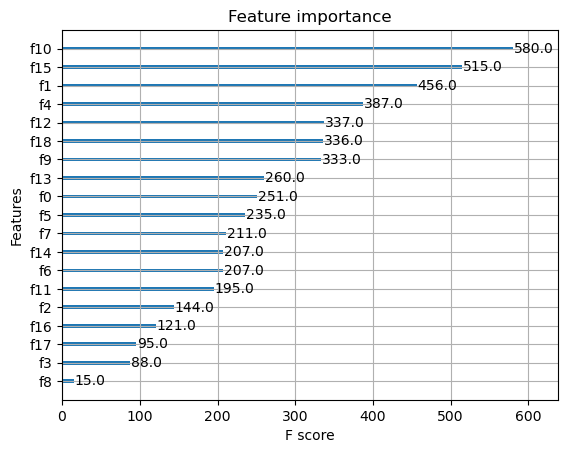

In [315]:
import matplotlib.pyplot as plt

xgb.plot_importance(best_xgboost)
plt.show()

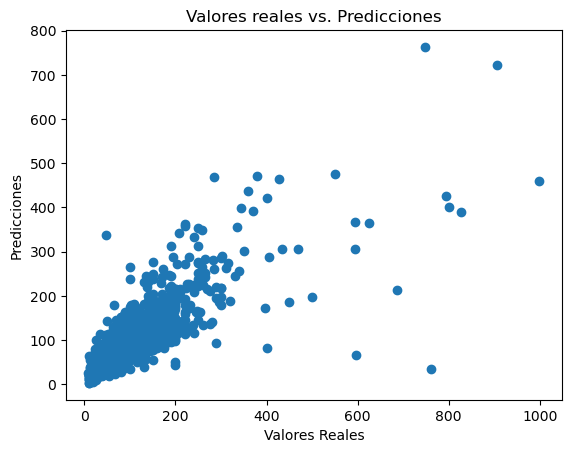

In [316]:
plt.scatter(y_test, y_pred_best)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs. Predicciones")
plt.show()

In [320]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_best)
print(r2)


0.6964627594284982


#### 5. Conclusión

El objetivo del presente documento era predecir el precio de un airbnb en función de distintas variables utilizando un modelo de regresión.
Las líneas generales han sido:
- Dividir la muestra en 2 dataset (train con el que se estima el modelo y test con el que se evalúa)
- Análisis exploratorio de la información. Primero se han dividido las variables en grupos homogeneos y se han analizado con la misma metodología.
- Con cada variable en el punto anterior, se ha tomado una decisión y en este punto se han transformado y depurado aquellas variables que lo necesitaban. Los cambios se recogen en las 2 muestras Train y Test.
- Búsqueda del modelo óptimo. Ya en la selección de variables por el método Lasso y Random Forest, se observa que las variables introducidas en el modelo generan un Error Cuadrático Medio muy elevado (superior a 1000) que al ser euros se considerada alto. Por este motivo se decide eliminar alguna variable y avanzar en la búsqueda del modelo. Se prueban distintos tipos de modelos de regresión (Linear Regression, Ridge, Random Forest, Gradient Boosting, SVN y XGBOOST)

En todos los casos hemos iterado los modelos cambiando hiperparámetros que buscasen minimizar el error sin que se produjera un sobreajuste. Como las variables presentaban escalas distintas, se optó por transformar tanto la muestra de entrenamiento como test por sus variables homólogasestandarizadas (Normalizadas) zon Z-score (de esta forma presentarían media 0 y desviación estandar de 1).

El modelo finalista que mejor rendimiento he logrado, ha sido con un XGBoost.

Las variables con mejores coeficientes son el número de habitaciones, el tipo de habitaciones y el número de camas seguido de el número de personas que puede alojar el airbnb, la comisión de limpieza, las personas extra y la fianza.
Observamos que cuanto mayor es el precio mayor es el residuo. En iteracciones intermedias se hicieron pruebas filtrando el dataset de entrenamiento y de test por airbnb's menores a 400€ para que pocos airbnb's caros no distorsionasen las predicciones pero se optó al final por mantener al no disminuir mucho el error.
Otro enfoque abordado que se hizo en una ejecución intermedia pero que no consta en el notebook fue limitar a airbnb's en España para evitar problemas de divisas y de ejuste del modelo. Se observó que aproximadamente 7000 observaciones estaban en España y el resto en otros paises. Al final el modelo cuenta con todas las observaciones asumiendo una estandarización previa de la variable de estudio.

El modelo final tiene un error cuadrático medio de 37.3 con una bondad de ajuste (R2) de 70%.